MongoDB查询出的结果使用列表字典存取

In [2]:

from pymongo import MongoClient
import pandas as pd


In [3]:
# 连接本地数据
localClient = MongoClient("mongodb://localhost:27017")
localDB = localClient['star_arena'] # 具体的数据库
localCollection = localDB.star_arena_thread # 指定集合，类似MySQL中的表

In [4]:
res = localCollection.find()

# 将res存储进pandas的dataframe
SA_df = pd.DataFrame(list(res))
SA_df.head()

,_id,displayStatus,id,content,threadType,userId,userName,userHandle,userPicture,createdDate,...,tipAmount,tipCount,currency,currencyAddress,currencyDecimals,like,bookmark,reposted,images,repost
0,653c7d8746842c8707a6adee,0,00a1d872-9f81-486f-a522-6b4c59c8f228,,repost,fe0e84e7-6599-4fe5-af1b-216f0f858af4,Nadim Chamoun 🔺,chamounnadim,https://pbs.twimg.com/profile_images/159361480...,2023-10-05T17:51:04.618Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],"{'displayStatus': 0, 'id': 'cd9e022a-971a-453b..."
1,653c7d8746842c8707a6adef,0,5f147c10-d2be-4204-bb84-4b1f098355b7,,repost,fe0e84e7-6599-4fe5-af1b-216f0f858af4,Nadim Chamoun 🔺,chamounnadim,https://pbs.twimg.com/profile_images/159361480...,2023-09-29T00:04:39.398Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],"{'displayStatus': 0, 'id': 'cf90a5db-e709-47ed..."
2,653c7d8746842c8707a6adf0,0,d8bd8733-d3e7-400a-9008-d7050220ec06,hello world,text,fe0e84e7-6599-4fe5-af1b-216f0f858af4,Nadim Chamoun 🔺,chamounnadim,https://pbs.twimg.com/profile_images/159361480...,2023-09-26T11:53:19.708Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
3,653c7d8846842c8707a6adf1,0,bda25a38-1c79-4474-97b8-9d15220654a9,plans for the weekend? i'm bored,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-22T16:36:12.735Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
4,653c7d8846842c8707a6adf2,0,a225dd65-3e55-456a-8b22-d736afae1e9e,The future of socialfi 👀,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-20T14:15:37.876Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN


对文本简单分析

In [4]:
# 展示threadType的种类
SA_df['threadType'].value_counts()

repost    1043264
text       240641
image      124894
Name: threadType, dtype: int64

In [25]:
# 绘制threadType为repost 的 content 不为空的记录
SA_df[(SA_df['threadType'] == 'repost') & (SA_df['content'] != "")].head()

,_id,displayStatus,id,content,threadType,userId,userName,userHandle,userPicture,createdDate,...,tipAmount,tipCount,currency,currencyAddress,currencyDecimals,like,bookmark,reposted,images,repost


<AxesSubplot:>

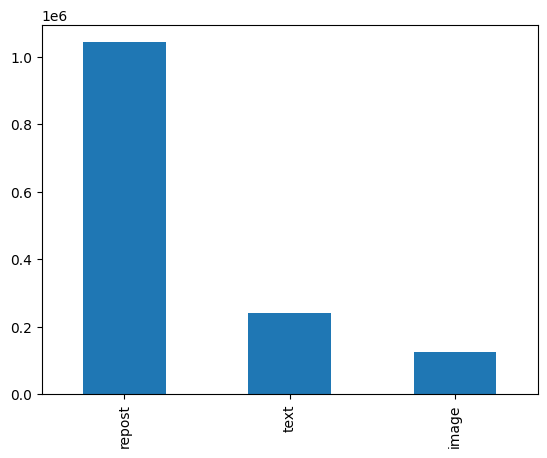

In [18]:
# 绘制各种类型地帖子的数量
SA_df['threadType'].value_counts().plot(kind='bar')

count    1.408799e+06
mean     4.897251e+01
std      2.757883e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.000000e+00
max      1.447925e+06
Name: content, dtype: float64


<AxesSubplot:>

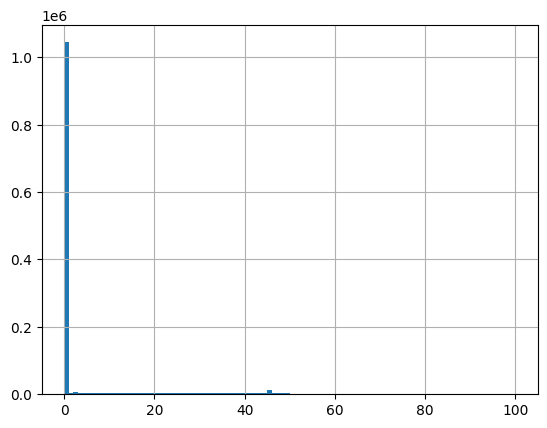

In [24]:
# 绘制帖子长度地分布（输出中位数与平均数）
print(SA_df["content"].str.len().describe())

# 绘制帖子长度地分布（直方图）（控制x最大值为100）
SA_df["content"].str.len().hist(bins=100, range=(0,100))

## LDA for stars arena

In [5]:
# 准备数据
SA_LDA_df = SA_df[SA_df['threadType'] != "repost"]
SA_LDA_df

,_id,displayStatus,id,content,threadType,userId,userName,userHandle,userPicture,createdDate,...,tipAmount,tipCount,currency,currencyAddress,currencyDecimals,like,bookmark,reposted,images,repost
2,653c7d8746842c8707a6adf0,0,d8bd8733-d3e7-400a-9008-d7050220ec06,hello world,text,fe0e84e7-6599-4fe5-af1b-216f0f858af4,Nadim Chamoun 🔺,chamounnadim,https://pbs.twimg.com/profile_images/159361480...,2023-09-26T11:53:19.708Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
3,653c7d8846842c8707a6adf1,0,bda25a38-1c79-4474-97b8-9d15220654a9,plans for the weekend? i'm bored,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-22T16:36:12.735Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
4,653c7d8846842c8707a6adf2,0,a225dd65-3e55-456a-8b22-d736afae1e9e,The future of socialfi 👀,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-20T14:15:37.876Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
5,653c7d8846842c8707a6adf3,0,bd01c8e3-7146-4ce6-a9fb-8b444457d8b6,So early ⭐️⭐️⭐️⭐️,text,d959844e-c55d-4bef-95fb-d0473ebbf208,queen maria,cryptoqueen42,https://pbs.twimg.com/profile_images/164858467...,2023-09-23T20:41:52.581Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
6,653c7d8846842c8707a6adf4,0,61f8566d-d2a1-4ad3-9406-dac500d1a8a1,Finally some action here :)<br/>Love it 🔺,text,d959844e-c55d-4bef-95fb-d0473ebbf208,queen maria,cryptoqueen42,https://pbs.twimg.com/profile_images/164858467...,2023-09-23T19:00:04.618Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408738,653e1e0658753aed78b561fe,0,62f200fb-df10-40dc-bfda-35c74a2d7ef3,Follow me for follow back 🔙 famz 💯,text,42141881-b196-4379-b0e1-272f54ca4ae5,Macy,IIfekwoaba11172,https://pbs.twimg.com/profile_images/170244617...,2023-10-06T14:04:45.661Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
1408739,653e1e0658753aed78b561ff,0,09e9f0e7-4754-4ea2-9fe4-1b77a7bda60a,I need to follow more legends ⭐✨.<br/><br/>Sho...,image,42141881-b196-4379-b0e1-272f54ca4ae5,Macy,IIfekwoaba11172,https://pbs.twimg.com/profile_images/170244617...,2023-10-06T13:49:53.277Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,"[{'id': 64058, 'url': 'https://static.starshar...",NaN
1408740,653e1e0658753aed78b56200,0,6c752a3d-5c09-41c6-a20e-24be07ca06ae,They said no pain no gain.🤔🤔🤔<br/>I don chop p...,text,42141881-b196-4379-b0e1-272f54ca4ae5,Macy,IIfekwoaba11172,https://pbs.twimg.com/profile_images/170244617...,2023-10-06T13:46:34.447Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
1408759,653e1e0658753aed78b56213,0,992b554a-3b65-4d1e-b543-c285da6e45b5,"It's a new day full of blessings, focus on the...",text,42141881-b196-4379-b0e1-272f54ca4ae5,Macy,IIfekwoaba11172,https://pbs.twimg.com/profile_images/170244617...,2023-10-06T06:34:01.015Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN


count    3.655350e+05
mean     1.887437e+02
std      5.411789e+03
min      0.000000e+00
25%      2.500000e+01
50%      5.400000e+01
75%      1.280000e+02
max      1.447925e+06
Name: content, dtype: float64


<AxesSubplot:>

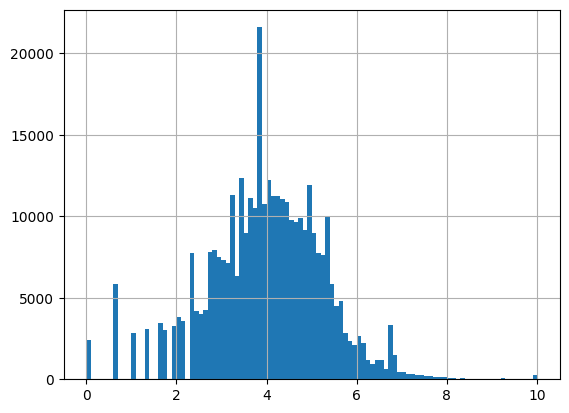

In [8]:
# 绘制SA_LDA_df中content长度的分布，对数变换后的直方图
import numpy as np
print(SA_LDA_df["content"].str.len().describe())

SA_LDA_df["content"].str.len().apply(np.log).hist(bins=100, range=(0, 10))

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize
import string as st
import re
import emoji

In [11]:
# 停用词表
with open("./LDA/stop_words.txt", "r", encoding="utf-8") as f:
    string = f.read()
stop_words = string.split("\n")

In [12]:
# emoji demojize
SA_LDA_df['content'] = SA_LDA_df['content'].apply(emoji.demojize)
SA_LDA_df.head()

C:\Users\86139\AppData\Local\Temp\ipykernel_42532\3066843352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SA_LDA_df['content'] = SA_LDA_df['content'].apply(emoji.demojize)


,_id,displayStatus,id,content,threadType,userId,userName,userHandle,userPicture,createdDate,...,tipAmount,tipCount,currency,currencyAddress,currencyDecimals,like,bookmark,reposted,images,repost
2,653c7d8746842c8707a6adf0,0,d8bd8733-d3e7-400a-9008-d7050220ec06,hello world,text,fe0e84e7-6599-4fe5-af1b-216f0f858af4,Nadim Chamoun 🔺,chamounnadim,https://pbs.twimg.com/profile_images/159361480...,2023-09-26T11:53:19.708Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
3,653c7d8846842c8707a6adf1,0,bda25a38-1c79-4474-97b8-9d15220654a9,plans for the weekend? i'm bored,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-22T16:36:12.735Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
4,653c7d8846842c8707a6adf2,0,a225dd65-3e55-456a-8b22-d736afae1e9e,The future of socialfi :eyes:,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-20T14:15:37.876Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
5,653c7d8846842c8707a6adf3,0,bd01c8e3-7146-4ce6-a9fb-8b444457d8b6,So early :star::star::star::star:,text,d959844e-c55d-4bef-95fb-d0473ebbf208,queen maria,cryptoqueen42,https://pbs.twimg.com/profile_images/164858467...,2023-09-23T20:41:52.581Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
6,653c7d8846842c8707a6adf4,0,61f8566d-d2a1-4ad3-9406-dac500d1a8a1,Finally some action here :)<br/>Love it :red_t...,text,d959844e-c55d-4bef-95fb-d0473ebbf208,queen maria,cryptoqueen42,https://pbs.twimg.com/profile_images/164858467...,2023-09-23T19:00:04.618Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN


In [15]:
# remove html tag
def remove_html_tag(text):
    html_tag = re.compile("<.*?>")
    return re.sub(html_tag, "", text)

print(remove_html_tag("<html lang='zh' visible=true> 11 </html>"))

SA_LDA_df["content"] = SA_LDA_df["content"].apply(remove_html_tag)
SA_LDA_df.head()

 11 


C:\Users\86139\AppData\Local\Temp\ipykernel_42532\405511864.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SA_LDA_df["content"] = SA_LDA_df["content"].apply(remove_html_tag)


,_id,displayStatus,id,content,threadType,userId,userName,userHandle,userPicture,createdDate,...,tipAmount,tipCount,currency,currencyAddress,currencyDecimals,like,bookmark,reposted,images,repost
2,653c7d8746842c8707a6adf0,0,d8bd8733-d3e7-400a-9008-d7050220ec06,hello world,text,fe0e84e7-6599-4fe5-af1b-216f0f858af4,Nadim Chamoun 🔺,chamounnadim,https://pbs.twimg.com/profile_images/159361480...,2023-09-26T11:53:19.708Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
3,653c7d8846842c8707a6adf1,0,bda25a38-1c79-4474-97b8-9d15220654a9,plans for the weekend? i'm bored,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-22T16:36:12.735Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
4,653c7d8846842c8707a6adf2,0,a225dd65-3e55-456a-8b22-d736afae1e9e,The future of socialfi :eyes:,text,1fae33e1-2ae4-48bd-ad10-cc77118f28c1,Crypto Angel,tronicqueen,https://pbs.twimg.com/profile_images/165660841...,2023-09-20T14:15:37.876Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
5,653c7d8846842c8707a6adf3,0,bd01c8e3-7146-4ce6-a9fb-8b444457d8b6,So early :star::star::star::star:,text,d959844e-c55d-4bef-95fb-d0473ebbf208,queen maria,cryptoqueen42,https://pbs.twimg.com/profile_images/164858467...,2023-09-23T20:41:52.581Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
6,653c7d8846842c8707a6adf4,0,61f8566d-d2a1-4ad3-9406-dac500d1a8a1,Finally some action here :)Love it :red_triang...,text,d959844e-c55d-4bef-95fb-d0473ebbf208,queen maria,cryptoqueen42,https://pbs.twimg.com/profile_images/164858467...,2023-09-23T19:00:04.618Z,...,0.0,0,AVAX,None,18,NaN,NaN,NaN,[],NaN


In [18]:
# 去除content里面有"This thread is only visible to Ticket holders"的记录
SA_LDA_df = SA_LDA_df[
    ~SA_LDA_df["content"].str.contains("This thread is only visible to Ticket holders")
]
SA_LDA_df[SA_LDA_df["content"].str.contains("visible")]

,_id,displayStatus,id,content,threadType,userId,userName,userHandle,userPicture,createdDate,...,tipAmount,tipCount,currency,currencyAddress,currencyDecimals,like,bookmark,reposted,images,repost
8955,653c7dfa46842c8707a6d0e9,0,f21f9a06-f2a8-44eb-b237-3a3f342706a3,Nobs:red_triangle_pointed_up:@nobsfudUnfollowN...,text,814f3026-8ffb-423a-9240-4db75368269d,NGUYEN THANH VAN 🛸,Thanhvan030997,https://pbs.twimg.com/profile_images/168765872...,2023-09-23T21:46:30.365Z,...,0.00000,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
20787,653c7ea646842c8707a6ff21,0,f43f128a-6cd4-4e9a-b532-fdbb49fa9c90,"Behold, a funnel web spider! Looks SUPER simil...",image,d43047a0-4b2d-4784-83a0-499d8aae1760,Jerry Smith,JerrySmithfasho,https://pbs.twimg.com/profile_images/166541442...,2023-09-25T16:48:26.325Z,...,0.00000,0,AVAX,None,18,NaN,NaN,NaN,"[{'id': 1014, 'url': 'https://static.starshare...",NaN
26490,653c7f2246842c8707a71568,0,2aab946f-a075-426e-88d8-b283a703025c,Will always try to reward as much as I possibl...,text,1bd4721b-f205-4f07-a202-7110e744aa7b,Jiminy Crypto 🔺 🩸,jiminy_crypto,https://pbs.twimg.com/profile_images/168738156...,2023-10-22T12:10:43.013Z,...,0.00000,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
26531,653c7f2246842c8707a71591,0,cf779eb3-24e6-4526-86d0-ab3cc15b796c,"For now, we see a lot of posts about ticket pr...",image,1bd4721b-f205-4f07-a202-7110e744aa7b,Jiminy Crypto 🔺 🩸,jiminy_crypto,https://pbs.twimg.com/profile_images/168738156...,2023-10-21T15:10:07.772Z,...,0.00000,0,AVAX,None,18,NaN,NaN,NaN,"[{'id': 122016, 'url': 'https://static.starsha...",NaN
26737,653c7f2246842c8707a7165f,0,1b63d33d-0eed-4827-b502-4b1b89e076ba,"From a purely chart point of view, the hack ha...",image,1bd4721b-f205-4f07-a202-7110e744aa7b,Jiminy Crypto 🔺 🩸,jiminy_crypto,https://pbs.twimg.com/profile_images/168738156...,2023-10-17T14:08:57.570Z,...,0.00000,0,AVAX,None,18,NaN,NaN,NaN,"[{'id': 97672, 'url': 'https://static.starshar...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288482,653de253f45f12ea38cf7851,0,36b50bc3-b36a-4c56-a7ce-e5479436bd08,Stars do not pull each other down to be more v...,image,7571706c-60aa-4259-b339-b00ba3ed11b3,Best Bloc,BestBloc,https://pbs.twimg.com/profile_images/170913468...,2023-10-06T12:52:52.525Z,...,0.00000,0,AVAX,None,18,NaN,NaN,NaN,"[{'id': 63069, 'url': 'https://static.starshar...",NaN
1359450,653e18e30ef41d307ebf623c,0,851a7a7a-5b2f-48e4-93a5-ecf0e71e9886,Exclusive content to be published in threads v...,text,ef7a0f29-a86b-40c3-ae52-8b748861821d,Only Fans uncensored,onlyfansUnc,https://pbs.twimg.com/profile_images/171619160...,2023-10-22T20:43:26.161Z,...,0.00000,0,AVAX,None,18,NaN,NaN,NaN,[],NaN
1371135,653e1c3958753aed78b4a7bf,0,f34b0623-102e-43c5-ad8b-f4b3bb3d14e5,"For some time, I have been observing this aren...",text,b818c94d-006d-4bf4-85f4-460bd6273b95,hasky,SemenovyhAndrej,https://pbs.twimg.com/profile_images/171618312...,2023-10-22T21:28:50.567Z,...,0.00988,1,AVAX,None,18,NaN,NaN,NaN,[],NaN
1375233,653e1c6f58753aed78b4bcb1,0,60a301ca-93a7-41bf-8fb8-872dc4087e79,"Now that Starsarena is operating stably, I bel...",text,821126ca-0259-4bc6-994e-fb7d16da8cac,Lady 🔺,LadysAvax,https://pbs.twimg.com/profile_images/171655990...,2023-10-23T21:05:45.457Z,...,0.00000,0,AVAX,None,18,NaN,NaN,NaN,[],NaN


In [19]:
stop_words = set(stop_words)

# 分词+去停用词函数
def text_segmentation(text):
    
    # 实现功能"So early :star::star::star::star:-> So early"
    pattern = r":([^:]+):"
    text = re.sub(pattern, "", text)
    
    # Remove stopwords
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
        
    # Remove punctuation marks
    text = text.translate(str.maketrans("", "", st.punctuation))
    
    return " ".join(tokens)



SA_LDA_df["content.Seg"] = SA_LDA_df["content"].apply(text_segmentation)

In [20]:
# 向量化
n_feature = 1000 # 1000个特征
vectorizer = CountVectorizer(strip_accents="unicode",
                             max_features=n_feature,
                             stop_words='english',
                             max_df=0.5,
                             min_df=10)

X = vectorizer.fit_transform(SA_LDA_df["content.Seg"])

In [34]:
# LDA
plexs = []
scores = []
for i in range(2,21):
    lda_ex = LatentDirichletAllocation(n_components=i, 
                                max_iter=50, 
                                learning_method='online',
                                doc_topic_prior=0.1,
                                topic_word_prior=0.01,
                                random_state=0)
    
    lda_ex.fit(X)
    plexs.append(lda_ex.perplexity(X))
    scores.append(lda_ex.score(X))

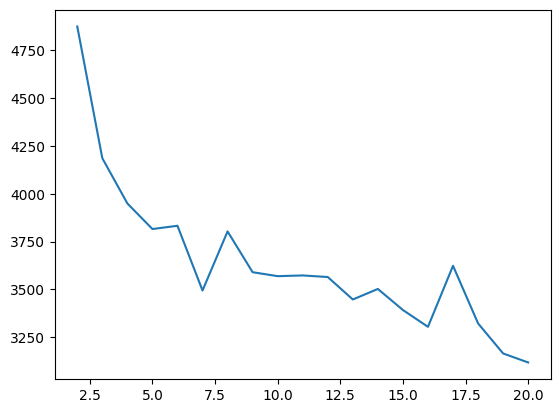

In [35]:
import matplotlib.pyplot as plt

x = list(range(2,21)) # n=7
plt.plot(x, plexs)
plt.show()

In [21]:
# 可视化
import pyLDAvis.sklearn as sklearnvis
import pyLDAvis

# 训练LDA模型
lda = LatentDirichletAllocation(
    n_components=5,
    max_iter=50,
    learning_method="online",
    doc_topic_prior=0.1,
    topic_word_prior=0.01,
    random_state=0,
)
lda.fit(X)
pyLDAvis.enable_notebook()
vis_data = sklearnvis.prepare(lda, X, vectorizer)

d:\anaconda\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
d:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
vis_data
# 保存vis_data为html文件
pyLDAvis.save_html(vis_data, "stars_arena.html")

In [23]:
# 输出主题下的关键词，根据主题词判定分类
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([feature_names[i] for i in topic.argsort()[: -10 - 1 : -1]]))

Topic 1:
ferdy ticket price sells purchase love bridge wo 100 10
Topic 2:
arena follow stars twitter com time https post starsarena followers
Topic 3:
buy gm trades tickets day guys app market bullish sold
Topic 4:
avax shares bought share people tw holders low buying money
Topic 5:
send gt max tvl crypto users starsarenacom key deposit minute


In [25]:
# 查找content 中有"ferdy"的记录
SA_LDA_df[SA_LDA_df["content"].str.contains("ferdy")]


,_id,displayStatus,id,content,threadType,userId,userName,userHandle,userPicture,createdDate,...,tipCount,currency,currencyAddress,currencyDecimals,like,bookmark,reposted,images,repost,content.Seg
1440,653c7dac46842c8707a6b38e,0,4cdb97a7-2f2d-4826-a7ef-f54fb225fd68,Come check out an amazing on-chain casino Ferd...,image,a54ba545-4315-4344-ae6d-ae0fe6894d7c,EYEamFIN🔻,eyeamfin,https://pbs.twimg.com/profile_images/171149214...,2023-10-20T00:14:04.632Z,...,0,AVAX,None,18,NaN,NaN,NaN,"[{'id': 110325, 'url': 'https://static.starsha...",NaN,check amazing on-chain casino Ferdy Fish talen...
1478,653c7dac46842c8707a6b3b4,0,1bf1748a-be32-4d9e-b42c-ad31df31413e,You mfers like to gamble with tickets how abou...,image,a54ba545-4315-4344-ae6d-ae0fe6894d7c,EYEamFIN🔺,eyeamfin,https://pbs.twimg.com/profile_images/168535513...,2023-10-04T12:29:26.703Z,...,0,AVAX,None,18,NaN,NaN,NaN,"[{'id': 31159, 'url': 'https://static.starshar...",NaN,mfers gamble tickets gambling real AVAX chain ...
1578,653c7dac46842c8707a6b418,0,599c4f54-d94e-443b-b2ef-b218f1d06c58,wen $ferdy?,text,a54ba545-4315-4344-ae6d-ae0fe6894d7c,EYEamFIN🔺,eyeamfin,https://pbs.twimg.com/profile_images/168535513...,2023-09-30T03:08:01.283Z,...,0,AVAX,None,18,NaN,NaN,NaN,[],NaN,wen ferdy
1706,653c7dac46842c8707a6b498,0,f60e2918-202d-429b-8571-941cf6776b7a,1) Pump your Star Shares price2) Dump your sha...,text,a54ba545-4315-4344-ae6d-ae0fe6894d7c,EYEamFIN🔺,eyeamfin,https://pbs.twimg.com/profile_images/168535513...,2023-09-26T14:01:19.790Z,...,0,AVAX,None,18,NaN,NaN,NaN,[],NaN,1 Pump Star Shares price2 Dump shares holders3...
1724,653c7dac46842c8707a6b4aa,0,d2d0049b-5608-462d-9e89-a9ee101f573b,should I give away a ferdy fish to one of my l...,text,a54ba545-4315-4344-ae6d-ae0fe6894d7c,EYEamFIN🔺,eyeamfin,https://pbs.twimg.com/profile_images/168535513...,2023-09-24T22:06:24.279Z,...,0,AVAX,None,18,NaN,NaN,NaN,[],NaN,ferdy fish lucky shareholders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895225,653d11017b9fa6f88f0528bc,0,54650c2a-720c-49f0-a9d6-847c78251ecf,VQ has entered the Arena!! Don’t miss out on o...,image,8987406e-6a39-4293-9b87-a70234aa35d9,JayR🔺,JayR3o5,https://pbs.twimg.com/profile_images/168856920...,2023-09-29T19:35:13.714Z,...,0,AVAX,None,18,NaN,NaN,NaN,"[{'id': 5983, 'url': 'https://static.starshare...",NaN,VQ entered Arena Don ’ ppl ferdy flip casino
1072485,653d34387b9fa6f88f07dd28,0,6c03d6b5-7746-4c4b-b244-58a1dd5eff53,Dont Forget to click here for the Casino oncha...,text,50d98097-1abc-49b7-875b-b3f661ca05ba,Manitou,Manitou0803,https://pbs.twimg.com/profile_images/165337105...,2023-10-03T11:50:48.184Z,...,0,AVAX,None,18,NaN,NaN,NaN,[],NaN,Dont Forget click Casino onchainhttps //ferdyf...
1247868,653d572e7b9fa6f88f0a8a3f,0,83056689-39ed-4a11-93f8-b5df2bc33666,Hi there! Welcome.:sparkles:𝘄𝗼𝘁 𝘁𝗵𝗶𝘀?Have aske...,image,4550c593-8ec4-4c66-9ba9-752e75903a1a,Ferdy₿erry,CIFerdinand,https://pbs.twimg.com/profile_images/170609799...,2023-10-25T12:23:17.336Z,...,1,AVAX,None,18,NaN,NaN,NaN,"[{'id': 150630, 'url': 'https://static.starsha...",NaN,Welcome.𝘄𝗼𝘁 𝘁𝗵𝗶𝘀 question spent days testing b...
1260458,653dad777b9fa6f88f0abb6d,0,2b26aed1-9629-4131-9e24-678be7199e0c,Don’t forget to use the below referral if you ...,text,c72729d8-86c1-4798-b84a-b419281d7739,̲̯̦̆̉̊̏̌̍̎̒,zedja_,https://pbs.twimg.com/profile_images/166466037...,2023-10-22T00:35:29.988Z,...,0,AVAX,None,18,NaN,NaN,NaN,[],NaN,Don ’ forget referral gamba double money trust...
